[[3710.08498 3687.7598  3665.52428 ...    4.90028    4.95004    5.     ]
 [3710.08498 3687.7598  3665.52428 ...    4.90028    4.95004    5.     ]
 [3710.08498 3687.7598  3665.52428 ...    4.90028    4.95004    5.     ]
 ...
 [3710.08498 3687.7598  3665.52428 ...    4.90028    4.95004    5.     ]
 [3710.08498 3687.7598  3665.52428 ...    4.90028    4.95004    5.     ]
 [3710.08498 3687.7598  3665.52428 ...    4.90028    4.95004    5.     ]]
1345.107574229721 1329.9324063906015 1229.577784765584 1221.1290048985652 1158.9553358769895 1153.2298681359252


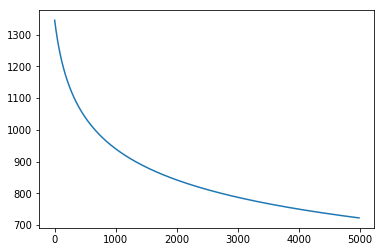

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#z = .0000003*x[::-1]**3 + .00001*x[::-1]**2 - .005*x[::-1]+5 -this will be my shape 
# x should go to more than 2000
# raster should have a 10 m cell size
x = np.arange(0,5000, 10)
#z = .00000003*x[::-1]**3 + .000001*x[::-1]**2 - .005*x[::-1]+5
z = .00000003*x[::-1]**3 + .0000001*x[::-1]**2 - .005*x[::-1]+5

##########fonnbu slope
a= -8.535E-8
b= .00055
c= -1.125
d= 1568.8
fonnbu_3dp = a*x**3+ b*x**2 + c*x +d
############
fonnbu_power = 3245.741*(x+150)**(-.1758)
raster = np.tile(z ,(900,1))
print raster
#plt.plot(x, z)
#plt.plot(x,fonnbu_3dp)
plt.plot(x,fonnbu_power)
plt.show
print fonnbu_power[0],fonnbu_power[1],fonnbu_power[10],fonnbu_power[11],fonnbu_power[20],fonnbu_power[21]

In [56]:
header = """ncols 500 
nrows 900 
xllcorner 0.000000 
yllcorner 0.000000 
cellsize 10.000000  
NODATA_value -9999.000000 """
np.savetxt("Fonnbu_dhm.asc", raster, header=header, comments='')

In [57]:
# now lets make release area! 

release = np.zeros((900,500))

for x in range(140, 160,1):
    for y in range(2, 10, 1):
        release[x,y] = 1
        
for x in range(440, 460,1):
    for y in range(2, 10, 1):
        release[x,y] = 1
        
for x in range(740, 760,1):
    for y in range(2, 10, 1):
        release[x,y] = 1
        


<function matplotlib.pyplot.show>

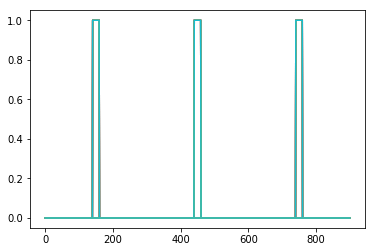

In [58]:
plt.plot(release)
plt.show

In [59]:
np.savetxt("third_deg_release.asc", release, fmt="%d", header=header, comments='')

In [60]:
#----------------------------|
#            a    b    c     |
# x          a    b    c     |
#            a    b    c     |  
#            a    b    c     |   
# x          a    b    c     |    
#            a    b    c     |       
#            a    b    c     |   
# x          a    b    c     |          
#            a    b    c     |
#----------------------------|
infra = np.zeros((900,500))
infra[:,195:200] = 3 # a
infra[:,295:300] = 2 # b
infra[:,395:400] = 1 # c
print infra[3,400]
np.savetxt("third_deg_infra_321_con.asc", infra, fmt="%d", header=header, comments='')

#----------------------------|
#                            |
# x          a    b    c     |
#                            |  
#                            |   
# x          d    e    f     |    
#                            |       
#                            |   
# x          g    h    i     |          
#                            |
#----------------------------|


infra = np.zeros((900,500))
infra[140:160,195:200] = 1 # a
infra[140:160,295:300] = 2 # b
infra[140:160,395:400] = 1 # c

infra[440:460,195:200] = 3 # d
infra[440:460,295:300] = 2 # e
infra[440:460,395:400] = 1 # f

infra[740:760,195:200] = 3 # g 
infra[740:760,295:300] = 1 # h
infra[740:760,395:400] = 2 # i

np.savetxt("infra_121_321_312.asc", infra, fmt="%d", header=header, comments='')


0.0
